<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_18_Distribuci%C3%B3n_hipergeom%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución hipergeométrica

# Objetivo

Calcular probabilidades, valor esperado y dispersión de datos de una distribución hipergeométrica.

# Descripción

Realizar cálculos de probabilidad conforme a la distribución de probabilidad hipergeométrica a partir de valores iniciales de los ejercicios.

Se generan las tablas de probabilidad conforme a distribución hipergeométrica, se identifican los valores de probabilidad cuando la variable discreta $x$ tenga algún exactamente algún valor, $\leq$ a algún valor o $\gt$ o $\geq$, entre otros.

Se calcula valor esperado, varianza y desviación estándar de ejercicios con características de distribuciones hipergeométrica.



# Fundamento teórico

La distribución de probabilidad hipergeométrica está estrechamente relacionada con la distribución binomial. Pero difieren en dos puntos: en la distribución hipergeométrica, los ensayos no son independientes y la probabilidad de éxito varía de ensayo a ensayo [@anderson2008].

La distribución de probabilidad de la variable aleatoria hipergeométrica $x$, el número de éxitos en una muestra aleatoria de tamaño $n$ que se selecciona de $N$ artículos, en los que $k$ se denomina éxito y $N - k$ se le llama fracaso [@camacho_avila_probabilidad_2019].

La distribución hipergeométrica es especialmente útil en todos aquellos casos en los que se extraigan muestras o se realicen experiencias repetidas sin devolución del elemento extraído o sin retornar a la situación experimental inicial

Es una distribución fundamental en el estudio de muestras pequeñas de poblaciones y en el cálculo de probabilidades de juegos de azar. Tiene grandes aplicaciones en el control de calidad, para procesos experimentales en los que no es posible retornar a la situación de partida [@cañas].

Como en el caso de la distribución binomial, la distribución hipergeométrica se aplica en el muestreo de aceptación, donde se toman muestras del material o las partes de los lotes con el fin de determinar si se acepta o no el lote completo [@walpole2012].

En Python se puede utilizar la biblioteca *scipy.stats* para trabajar con distribuciones hipergeométricas.

La distribución hipergeométrica se utiliza para modelar situaciones donde se extraen elementos sin reemplazo de un conjunto finito.

- La función *hypergeom.rvs(M=K, n=n, N=N, *size=5) permite generar números aleatorios,

- La función *hypergeom.pmf(x, M=K, n=n, N=N)* permite para calcular la densidad de probabilidad,

- La función *hypergeom.cdf(x, M=K, n=n, N=N)* calcula la probabilidad acumulada de una distribución hipergeométrica




## Fórmulas de distribución hipergeométrica


### Fórmula de probabilidad

La fórmula de la distribución hipergeométrica

$$f(x) =  \frac{\binom{r}{x} \cdot \binom{N-r}{n-x}}{\binom{N}{n}}   $$

Dónde:

-   $f(x)$ es la probabilidad de $x$ o la función de distribución

-   $n$ número de ensayos o longitud de la muestra casos que se extraen

-   $N$ número de elementos de la población

-   $r$ número de elementos exitosos en relación a la población

-   $x$ Valor de la variable aleatoria discreta $0,1,2,3, ... ...,n$ hasta el valor de $n$ tamaño de la muestra [@anderson_estadistica_2008].

-   ${\binom{r}{x}}$ Parte izquierda del numerador, representan el número de formas (combinaciones) en que se toman $x$ éxitos de un total de $r$ éxitos que hay en la población,

-   $\binom{N-r}{n-x}$ parte derecha del numerador representa el número de maneras en que se puede tomar $n - x$ fracasos de un total de $N - r$ elementos que hay en la población.

-   $\binom{N}{n}$ como denominador representan el número de maneras (cantidad de combinaciones) en que es posible tomar una muestra de tamaño $n$ de una población de tamaño $N$; [@anderson_estadistica_2008].

Recordando la fórmula para determinar el número de combinaciones en grupos de $n$ elementos de una población total de $N$ está dada por:\
$$C_{n}^{N} = \binom{N}{n} = \frac{N!}{n!\cdot(N-n)!}$$

Entonces desarrollando la fórmula con las combinaciones la función de probabilidad hipergeométrica queda de la siguiente manera:

$$
f(x) = \frac{\binom{r}{x} \cdot \binom{N-r}{n-x}}{\binom{N}{n}} = \frac{ (\frac{r!}{x!\cdot(r-x)!})\cdot(\frac{(N-r)!}{(n-x)!\cdot((N-r) - (n-x))!})}{\frac{N!}{n!\cdot(N-n)!}}
$$

- $N$ es el tamaño de población,

- $n$ es el tamaño de la muestra extraída,

- $r$ es el número de elementos en la población original que pertenecen a la categoría deseada (exitosos) y

- $x$ es la variable aleatoria o el número de elementos en la muestra que pertenecen a dicha categoría.

### Fórmula de probabilidad acumulada

$$
F(x) =
\sum_{0}^{n}f.x_i
$$

El total de la probabilidad acumulada debe ser $1$.

### Valor esperado

El valor esperado significa lo que se espera que suceda como estimación promedio o esperanza media en una distribución de tipo discreta como la hipergeométrica o la binomia o la Poisson entre otras.
$$
VE(x) = \mu = n  \cdot \frac{r}{N}
$$


### Fórmula para varianza

$$
varianza = \sigma^{2} = n  \cdot \frac{r}{N} \cdot (1 - \frac{r}{N}) \cdot \frac{N-n}{N-1}
$$

### Fórmula de la desviación estándar

$$
\sigma = \sqrt{varianza} = \sqrt{\sigma^{2}}
$$

# Desarrollo



## Cargar librerías


In [40]:
# Pendiente
# Se cargan librerías adecuadas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
from scipy.special import comb # Para combinaciones

import pandas as pd

from IPython.display import display, HTML # Para ver HTML


## Cargar funciones


In [41]:
def f_prob_hyper(x, r, n, N):
  probabilidad = (comb(r, x) * comb(N - r, n - x)) / comb(N, n)
  return probabilidad

def f_tabla_hyper (xi, r, n, N):
  # Calcular las probabilidades para cada valor de xi

  probabilidades = [hypergeom.pmf(x, M=N, n=r, N=n) for x in xi]
  # Calcular las probabilidades acumuladas
  probabilidades_acumuladas = [hypergeom.cdf(x, M=N, n=r, N=n) for x in xi]

  # Crear un DataFrame para la tabla de probabilidades
  tabla_probabilidades = pd.DataFrame({'x': xi, 'P(X = x)': probabilidades, 'P(X <= x)': probabilidades_acumuladas})

  # Mostrar la tabla de probabilidades
  #print(tabla_probabilidades)
  return (tabla_probabilidades)
def f_graficos_probabilidad_discreta(tabla):
    # Crear un DataFrame a partir de la tabla de probabilidad
    df = pd.DataFrame(tabla)

    # Gráfico de barras de probabilidad
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(df.index, df['P(X = x)'], color='skyblue')
    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad')
    plt.title('Gráfico de Barras de Probabilidad')

    # Gráfico lineal de probabilidad acumulada
    plt.subplot(1, 2, 2)
    plt.plot(df.index, df['P(X <= x)'], marker='o', color='green')
    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad Acumulada')
    plt.title('Gráfico Lineal de Probabilidad Acumulada')

    plt.tight_layout()
    plt.show()

def f_graficos_probabilidad_discreta_VE_ds(tabla, VE, ds):
    # Crear un DataFrame a partir de la tabla de probabilidad
    df = pd.DataFrame(tabla)

    # Gráfico de barras de probabilidad
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(df.index, df['P(X = x)'], color='skyblue')

    # El Valor esperado y desviación izq y der
    # Agregar una línea punteada
    plt.axvline(x=VE, color='red', linestyle='--', label='VE='+str(np.round(VE, 2)))
    plt.axvline(x=VE - ds, color='blue', linestyle='--', label='Desv. Std='+str(np.round(ds, 2)))
    plt.axvline(x=VE + ds, color='blue', linestyle='--')

    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad')
    plt.title('Gráfico de Barras de Probabilidad con VE y Desv Std.')

    plt.tight_layout()
    plt.legend()
    plt.show()

## Canicas blancas y canicas negras

-   $N=15$ Total de canicas de la población.

-   $r = 9$ Canicas blancas. Casos exitosos.

-   $n =$ Cantidad que se extrae $5$. Tamaño de la muestra.

-   $x_i=\text{{0, 1, 2, 3, 4, 5}}$ Variable aleatoria que puede tener valores desde $0$ hasta tamaño de la muestra $n$.

### Inicializar variables


In [42]:
r = 9   # Número total de canicas blancas (éxito) en la población
N = 15  # Tamaño total de la población
n = 5   # Tamaño de la muestra
xi = [0, 1, 2, 3, 4, 5]
print ("Inicialización de variables")
print ("r es el número de casos de (éxito) en la población: ", r)
print ("N es el tamaño total de la población: ", N)
print ("n es el tamaño de la muestra: ", n)
print ("Valores de x ", xi)

Inicialización de variables
r es el número de casos de (éxito) en la población:  9
N es el tamaño total de la población:  15
n es el tamaño de la muestra:  5
Valores de x  [0, 1, 2, 3, 4, 5]


### Calcular probabilidad para $f(x=3)$

Llamando la función *f_prob_hype()* que multiplica combinaciones.

Con la función de probabilidad hipergeométrica *hypergeom.pmf(x, M=N, n=r, N=n)*, las literales que se utilizan como parámetros hay que alinearlos conforme a los argumentos que serían las variables incialmente definidas.

- El parámetro *M* es el tamaño de la población o sea *N* como argumento.
- El parmaétro *n* son los casos exitosos o sea *r* como argumento.
- *N* es el tamaño de la muestra o sea *n* en el argumento.


In [43]:

# Calcular P(X = 3)
x = 3  # Número de canicas blancas que úede haber en la muestra

probabilidad = f_prob_hyper(x=3, r = 9, n=5, N = 15)
print (np.round(probabilidad, 4))
print("La probabilidad de extraer ", x , " canicas blancas de la muestra de ", n, "es ", np.round(probabilidad * 100, 2), "%")

# Se debe generar el mismo valor, se actualiza la variable probabilidad
probabilidad = hypergeom.pmf(x, M=N, n=r, N=n)
print ("Deben ser el mismo valor: ...")
print("La probabilidad de extraer ", x , " canicas blancas de la muestra de ", n, "es ", np.round(probabilidad * 100, 2), "%")



0.4196
La probabilidad de extraer  3  canicas blancas de la muestra de  5 es  41.96 %
Deben ser el mismo valor: ...
La probabilidad de extraer  3  canicas blancas de la muestra de  5 es  41.96 %


### Crear tabla de distribución

Se construye tabla de distribucion con la función *f_tabla_hyper()* previamente codificada

In [44]:
tabla = f_tabla_hyper(xi, r, n, N)
# print(tabla)
tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

### Visualizar probabilidades



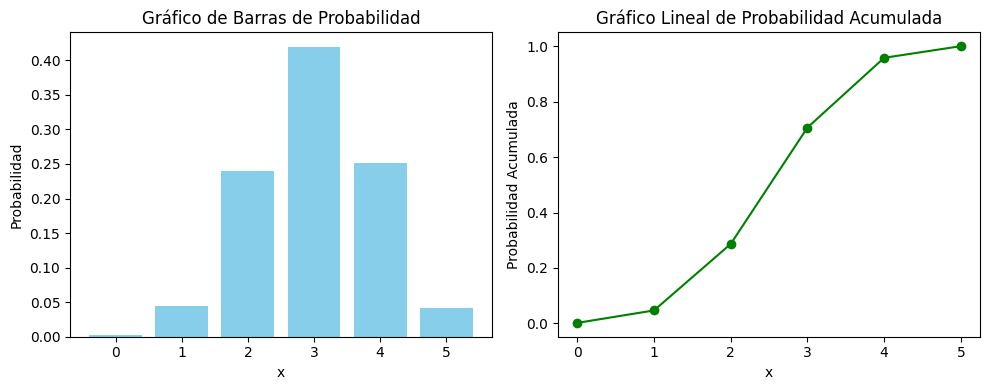

In [45]:
f_graficos_probabilidad_discreta(tabla)

### Valor esperado


In [46]:
VE = n * (r/N)
print ("Valor esperado : ", np.round(VE, 4))


Valor esperado :  3.0


Se espera que se obtengan o extraigan $3$ canicas blancas. ¿pero cuánto puede variar?

### Varianza



In [47]:
varianza = VE * (1 - r/N) * ((N-n) / (N-1))
print ("La varianza es de : ", np.round(varianza, 4))

La varianza es de :  0.8571


### Desviación estándar


In [48]:
desv_std = np.sqrt(varianza)
print ("La desviación estándar es de: ", np.round(desv_std, 4))

La desviación estándar es de:  0.9258


La desviación estándar, significa que de las 3 canicas que se espera que sean blancas puede variar aproximadamente una canica más o una canica menos es decir, tal vez 4 o 2.

### Visualizar probabilidades con VE y Desv. Std.


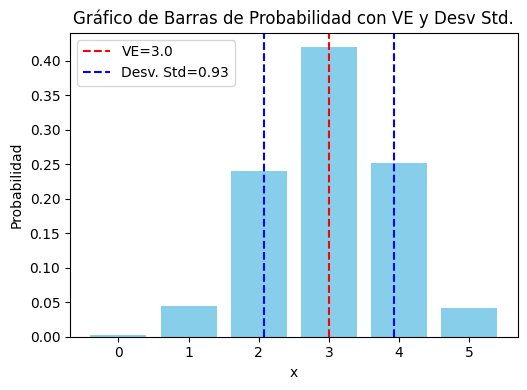

In [49]:
f_graficos_probabilidad_discreta_VE_ds(tabla, VE, desv_std)

## Baraja española

Suponga la extracción aleatoria de $n = 8$ elementos de un conjunto formado por $N=40$ elementos totales (cartas baraja española) de los cuales $r=10$ son del tipo oros (salir oro) y $30$ son del tipo complementario (no salir oro).

Si se realizan las extracciones sin devolver los elementos extraídos y se identifica a $x$
al número de elementos del tipo oros que se extraen en las 8 cartas; $x$
sigue una distribución hipergeométrica.

- ¿Cuál es la probabilidad de extraer 2 oros? $f(x=2)$,
- ¿Cuál es la probabilidad de extraer 5 oros? $f(x=4)$,
- ¿Cuál es la probabilidad por debajo de 4 oros? $F(x\le2)$,
- ¿Cuál es la probabilidad de extraer entre 3 y 4  oros? $f(3 \le x \le 2)$,


### Inicializar valores


In [50]:
r = 10   # Número de casos de (éxito) en la población. Oros
N = 15  # Tamaño total de la población
n = 8   # Tamaño de la muestra
xi = [0, 1, 2, 3, 4, 5, 6, 7, 8]
print ("Inicialización de variables")
print ("r es el número de casos de (éxito) en la población: ", r)
print ("N es el tamanño total de la población: ", N)
print ("n es el tamaño de la muestra: ", n)
print ("Valores de x ", xi)


Inicialización de variables
r es el número de casos de (éxito) en la población:  10
N es el tamanño total de la población:  15
n es el tamaño de la muestra:  8
Valores de x  [0, 1, 2, 3, 4, 5, 6, 7, 8]


### Calcular probabilidad para $f(x=2)$

In [51]:
# Calcular P(X = 2)
x = 3  # Número de oros que puede haber en la muestra

probabilidad = f_prob_hyper(x=x, r = r, n=n, N = N)
print (np.round(probabilidad, 4))
print("La probabilidad de extraer ", x , " oros de la muestra de ", n, "es ", np.round(probabilidad * 100, 2), "%")


0.0186
La probabilidad de extraer  3  oros de la muestra de  8 es  1.86 %


### Tabla de probabilidad

In [52]:
tabla = f_tabla_hyper(xi, r, n, N)
# print(tabla)
tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

### Visualizar probabilidad

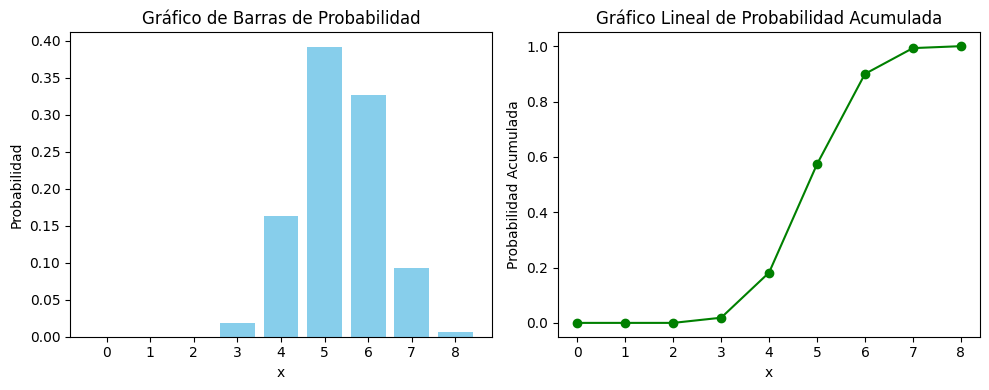

In [53]:
f_graficos_probabilidad_discreta(tabla)

### Valor esperado

In [54]:
VE = n * (r/N)
print ("Valor esperado : ", np.round(VE, 4))

Valor esperado :  5.3333


### Varianza


In [55]:
varianza = VE * (1 - r/N) * ((N-n) / (N-1))
print ("La varianza es de : ", np.round(varianza, 4))

La varianza es de :  0.8889


### Desviación estándar

In [56]:
desv_std = np.sqrt(varianza)
print ("La desviación estándar es de: ", np.round(desv_std, 4))

La desviación estándar es de:  0.9428


### Visualizar probabilidad con VE y Desv. Std


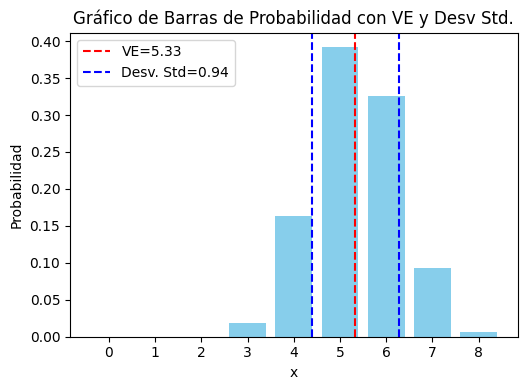

In [57]:
f_graficos_probabilidad_discreta_VE_ds(tabla, VE, desv_std)

## Lote de componentes

Lotes con $N=40$ componentes, históricamente hay $r=3$ defectuosos en todo el lote .Si se encuentra más de $3$ es inaceptable el lote o es falta de calidad.

El procedimiento para obtener muestras del lote consiste en seleccionar $n=5$ componentes al azar y rechazar el lote si se encuentra un componente defectuoso.

¿Cuál es la probabilidad de que, en la muestra, se encuentre exactamente un componente defectuoso $f(x=1)$, si en todo el lote hay 3 defectuosos?

Si se utiliza la distribución hipergeométrica con $n=5$,$N=40$,$r=3$.
 y $x=1$, se encuentra que la probabilidad de obtener un componente defectuoso es:

### Inicialización de variables

In [58]:
r = 3   # Número total de componentes defectuososo (éxito) en la población
N = 40  # Tamaño total de la población
n = 5   # Tamaño de la muestra
xi = [0, 1, 2, 3, 4, 5]
print ("Inicialización de variables")
print ("r es el número de casos de (éxito) en la población: ", r)
print ("N es el tamaño total de la población: ", N)
print ("n es el tamaño de la muestra: ", n)
print ("Valores de x ", xi)

Inicialización de variables
r es el número de casos de (éxito) en la población:  3
N es el tamaño total de la población:  40
n es el tamaño de la muestra:  5
Valores de x  [0, 1, 2, 3, 4, 5]


### Probabilida para $f(x=1)$

In [59]:
# Calcular P(X = 1)
x = 1  # Componentes defectuosos que puede haber en la muestra

probabilidad = f_prob_hyper(x=x, r = r, n=n, N = N)
print (np.round(probabilidad, 4))
print("La probabilidad de extraer ", x , " componentes defectuosos de la muestra de ", n, "es ", np.round(probabilidad * 100, 2), "%")


0.3011
La probabilidad de extraer  1  componentes defectuosos de la muestra de  5 es  30.11 %


### Tabla de probabilidad

In [60]:
tabla = f_tabla_hyper(xi, r, n, N)
# print(tabla)
tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

### Valor esperado


In [61]:
VE = n * (r/N)
print ("Valor esperado : ", np.round(VE, 4))

Valor esperado :  0.375


### Varianza

In [62]:
varianza = VE * (1 - r/N) * ((N-n) / (N-1))
print ("La varianza es de : ", np.round(varianza, 4))

La varianza es de :  0.3113


### Desviación estándar

In [63]:
desv_std = np.sqrt(varianza)
print ("La desviación estándar es de: ", np.round(desv_std, 4))

La desviación estándar es de:  0.5579


### Visualizar probabilidad con VE y Desv. Std.

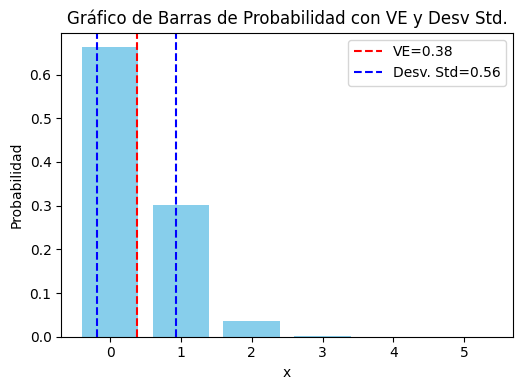

In [64]:
f_graficos_probabilidad_discreta_VE_ds(tabla, VE, desv_std)

# Interpretación del caso

- ¿Cómo se interpreta el valor esperado de una distribución discreta como la hipergeométrica u otra distribución discreta como la binomial o la Poisson?
- ¿Que significa varianza de una distribución de probabilidad?
- ¿Qué significa desviación estándar de una distribución de probabilidad y ¿cuál es la diferencia con la varianza? y ¿qué relación hay con el valor esperado?

Responder a las preguntas de probabilidad de cada ejercicio del caso:

- Del ejercicio de canicas blancas:
  - ¿cual es la probabilida de extraer dos canicas blancas de las 5?. f(x=2).
  - ¿cual es la probabilidad de extraer más de 3 canicas blancas de las 5?. $F(x>3)$.
  - ¿Qué significado tiene el valor esperado $VE$ y la desviación estándar del ejercicio de canicas?
- Del ejercicio de baraja española:
  - ¿Cuál es la probabilidad de extraer 2 oros? $f(x=2)$,
  - ¿Cuál es la probabilidad de extraer 5 oros? $f(x=4)$,
  - ¿Cuál es la probabilidad por debajo de 4 oros? $F(x≤2)$,
  - ¿Cuál es la probabilidad de extraer entre 3 y 4 oros?  $F(3≤x≤2)$
  - ¿Qué significado tiene el valor esperado $VE$ y la desviación estándar del ejercicio de la baraja española?

- Del lote de componentes defectuosos:
  - ¿Cuál es la probabilidad de encontrar 0 componentes defectuosos?, $f(x=0)$
  - ¿Cuál es la probabilidad de encontrar más de un componente defectuosos?, $F(x>1)$
  - ¿Qué significado tiene el valor esperado $VE$ y la desviación estándar del ejercicio de componentes defectuosos?
  


# Bibliografía

- Anderson, David R., Dennis J. Sweeney, and Thomas A. Williams. 2008. Estadística Para Administración y Economía. 10th ed. Australia • Brasil • Corea • España • Estados Unidos • Japón • México • Reino Unido • Singapur: Cengage Learning,.

- Camacho Avila, Marcela. 2019. “Probabilidad y Estadística. Modelos Probabilísticos.” 2019. http://148.215.1.182/bitstream/handle/20.500.11799/108238/secme-34236_1.pdf?sequence=1.

- Cañas, Juan. s.f. Distribución hipergeométrica. https://proyectodescartes.org/iCartesiLibri/materiales_didacticos/EstadisticaProbabilidadInferencia/VAdiscreta/4_1DistribucionHipergeometrica/index.html

- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.

- https://rpubs.com/rpizarro/1045192